# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p** ::: roșu galben albastru, category encoding
- Handle missing values if any **1p** missing values categories - most frequest sau o categorie extra
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.

In [22]:
data.shape
data.info
     


<bound method DataFrame.info of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      

In [36]:
data.info()

<class 'pandas.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   workclass       32537 non-null  str  
 2   fnlwgt          32537 non-null  int64
 3   education       32537 non-null  str  
 4   education-num   32537 non-null  int64
 5   marital-status  32537 non-null  str  
 6   occupation      32537 non-null  str  
 7   relationship    32537 non-null  str  
 8   race            32537 non-null  str  
 9   sex             32537 non-null  str  
 10  capital-gain    32537 non-null  int64
 11  capital-loss    32537 non-null  int64
 12  hours-per-week  32537 non-null  int64
 13  native-country  32537 non-null  str  
 14  income          32537 non-null  str  
dtypes: int64(6), str(9)
memory usage: 4.0 MB


In [23]:
data.isna().sum()
     


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [30]:
data['workclass'].unique()

<StringArray>
[       'State-gov', 'Self-emp-not-inc',          'Private',
      'Federal-gov',        'Local-gov',                '?',
     'Self-emp-inc',      'Without-pay',     'Never-worked']
Length: 9, dtype: str

In [31]:
data['education'].unique()


<StringArray>
[   'Bachelors',      'HS-grad',         '11th',      'Masters',
          '9th', 'Some-college',   'Assoc-acdm',    'Assoc-voc',
      '7th-8th',    'Doctorate',  'Prof-school',      '5th-6th',
         '10th',      '1st-4th',    'Preschool',         '12th']
Length: 16, dtype: str

In [32]:
data['marital-status'].unique()


<StringArray>
[        'Never-married',    'Married-civ-spouse',              'Divorced',
 'Married-spouse-absent',             'Separated',     'Married-AF-spouse',
               'Widowed']
Length: 7, dtype: str

In [33]:
data['occupation'].unique()

<StringArray>
[     'Adm-clerical',   'Exec-managerial', 'Handlers-cleaners',
    'Prof-specialty',     'Other-service',             'Sales',
      'Craft-repair',  'Transport-moving',   'Farming-fishing',
 'Machine-op-inspct',      'Tech-support',                 '?',
   'Protective-serv',      'Armed-Forces',   'Priv-house-serv']
Length: 15, dtype: str

In [34]:
data['relationship'].unique()

<StringArray>
['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
 'Other-relative']
Length: 6, dtype: str

In [35]:
data['income'].unique()

<StringArray>
['<=50K', '>50K']
Length: 2, dtype: str

In [37]:
(data == '?').sum().sum()

np.int64(4261)

In [38]:
(data == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [26]:
data[data == '?'].any(axis=1) 

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32537, dtype: bool

In [ ]:
(data == '?').sum() / len(data) * 100 # Percentage of '?' values

age               0.000000
workclass         5.642807
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.664321
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.788733
income            0.000000
dtype: float64

In [40]:
df_clean = data.replace('?', pd.NA).dropna()

In [42]:

print(f"Original shape: {data.shape}")
print(f"After dropping rows with '?': {df_clean.shape}")
print(f"Dropped {len(data) - len(df_clean)} rows")

Original shape: (32537, 15)
After dropping rows with '?': (30139, 15)
Dropped 2398 rows


In [46]:
print("\n" + "="*50)
print("check Valori lipsa")
print("="*50)

df_clean.isnull().sum()
df_clean=df_clean.dropna()




check Valori lipsa


In [54]:
print("\n" + "="*50)
print("check duplicates")
print("="*50)

df_clean.duplicated().sum()
df_clean=df_clean.drop_duplicates()


check duplicates


In [ ]:
print("\nChecking for impossible values:")
print(f"age range: [{df_clean['age'].min()}, {df_clean['age'].max()}]")
print(f"hours-per-week range: [{df_clean['hours-per-week'].min()}, {df_clean['hours-per-week'].max()}]")


Checking for impossible values:
age range: [17, 90]
hours-per-week range: [1, 99]


In [53]:
print("\n" + "="*50)
print("3. Outlier Detection & Treatment")
print("="*50)

def detect_outliers_iqr(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


3. Outlier Detection & Treatment


In [11]:
print("\n" + "="*50)
print("4. Feature encoding")
print("="*50)


4. Feature encoding


In [57]:
def categorize_education(edu):
    """
    Categorize education into 3 broad categories:
    1. Elementary: Preschool through 8th grade
    2. High_School: 9th through 12th grade + HS-grad
    3. College: Some college, Associates, Bachelors, Masters, Doctorate
    """
    if edu in ['Preschool', '1st-4th', '5th-6th', '7th-8th']:
        return 'Elementary'
    elif edu in ['9th', '10th', '11th', '12th', 'HS-grad']:
        return 'High_School'
    elif edu in ['Some-college', 'Assoc-voc', 'Assoc-acdm', 
                 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']:
        return 'College'
    else:
        return 'Unknown'  # Fallback for any unexpected values


In [58]:
test_values = ['Preschool', '5th-6th', '9th', '12th', 'HS-grad', 
               'Some-college', 'Assoc-acdm', 'Bachelors', 'Masters', 'Doctorate']

print("Testing 3-category education encoding:")
print("-" * 50)
for val in test_values:
    print(f"{val:15} -> {categorize_education(val)}")

Testing 3-category education encoding:
--------------------------------------------------
Preschool       -> Elementary
5th-6th         -> Elementary
9th             -> High_School
12th            -> High_School
HS-grad         -> High_School
Some-college    -> College
Assoc-acdm      -> College
Bachelors       -> College
Masters         -> College
Doctorate       -> College


In [61]:
# Apply to your DataFrame
df_clean['education_categories'] = df_clean['education'].apply(categorize_education)

print("\n" + "=" * 50)
print("MAPPING DETAILS:")
print("=" * 50)

# Show what goes into each category
mapping = {
    'Elementary': ['Preschool', '1st-4th', '5th-6th', '7th-8th'],
    'High_School': ['9th', '10th', '11th', '12th', 'HS-grad'],
    'College': ['Some-college', 'Assoc-voc', 'Assoc-acdm', 
                'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
}

for category, values in mapping.items():
    print(f"\n{category}:")
    for value in values:
        if value in df_clean['education'].unique():
            count = (df_clean['education'] == value).sum()
            print(f"  - {value}")


MAPPING DETAILS:

Elementary:
  - Preschool
  - 1st-4th
  - 5th-6th
  - 7th-8th

High_School:
  - 9th
  - 10th
  - 11th
  - 12th
  - HS-grad

College:
  - Some-college
  - Assoc-voc
  - Assoc-acdm
  - Bachelors
  - Masters
  - Prof-school
  - Doctorate


In [62]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   30139 non-null  int64
 1   workclass             30139 non-null  str  
 2   fnlwgt                30139 non-null  int64
 3   education             30139 non-null  str  
 4   education-num         30139 non-null  int64
 5   marital-status        30139 non-null  str  
 6   occupation            30139 non-null  str  
 7   relationship          30139 non-null  str  
 8   race                  30139 non-null  str  
 9   sex                   30139 non-null  str  
 10  capital-gain          30139 non-null  int64
 11  capital-loss          30139 non-null  int64
 12  hours-per-week        30139 non-null  int64
 13  native-country        30139 non-null  str  
 14  income                30139 non-null  str  
 15  education_categories  30139 non-null  str  
dtypes: int64(6), str(10)

In [66]:
df_clean['education_categories'].unique()

<StringArray>
['College', 'High_School', 'Elementary']
Length: 3, dtype: str

In [68]:
df_clean['income'] = df_clean['income'].map({'<=50K': 0, '>50K': 1})


In [69]:
df_clean['income'].unique()

array([0, 1])

In [70]:
df_clean['income'].value_counts()

income
0    22633
1     7506
Name: count, dtype: int64

In [78]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# First, map workclass to 3 categories
def workclass_category(workclass):
    """Map workclass to 3 categories: employed, unemployed, other"""
    if pd.isna(workclass) or workclass == '?':
        return 'other'  # Handle missing/unknown
    
    employed_categories = ['Private', 'State-gov', 'Federal-gov', 'Local-gov', 
                          'Self-emp-not-inc', 'Self-emp-inc']
    
    unemployed_categories = ['Without-pay', 'Never-worked']
    
    if workclass in employed_categories:
        return 'employed'
    elif workclass in unemployed_categories:
        return 'unemployed'
    else:
        return 'other'

# Apply the categorization
df_clean['workclass_categories'] = df_clean['workclass'].apply(workclass_category)

print("Workclass distribution")
print(df_clean['workclass_categories'].value_counts())

Workclass distribution
workclass_categories
employed      30125
unemployed       14
Name: count, dtype: int64


In [87]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   30139 non-null  int64
 1   workclass             30139 non-null  str  
 2   fnlwgt                30139 non-null  int64
 3   education             30139 non-null  str  
 4   education-num         30139 non-null  int64
 5   marital-status        30139 non-null  str  
 6   occupation            30139 non-null  str  
 7   relationship          30139 non-null  str  
 8   race                  30139 non-null  str  
 9   sex                   30139 non-null  str  
 10  capital-gain          30139 non-null  int64
 11  capital-loss          30139 non-null  int64
 12  hours-per-week        30139 non-null  int64
 13  native-country        30139 non-null  str  
 14  income                30139 non-null  int64
 15  education_categories  30139 non-null  str  
 16  workclass_categories

In [84]:
df_clean['workclass_categories'].unique()

<StringArray>
['employed', 'unemployed']
Length: 2, dtype: str

In [85]:
df_clean = df_clean.drop('workclass_3cat', axis=1)

In [86]:
y = df_clean["hours-per-week"]
x = df_clean.drop("hours-per-week", axis=1)

print(x.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss native-country  income education_categories  \
0          2174             0  United-States       0              College   
1             0             

In [88]:
y.describe()


count    30139.000000
mean        40.934703
std         11.978753
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [81]:
x.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,income
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,0.249046
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,0.432468
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,0.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,0.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,1.000000


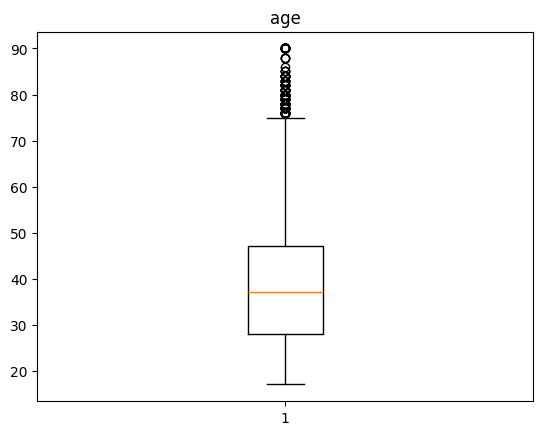

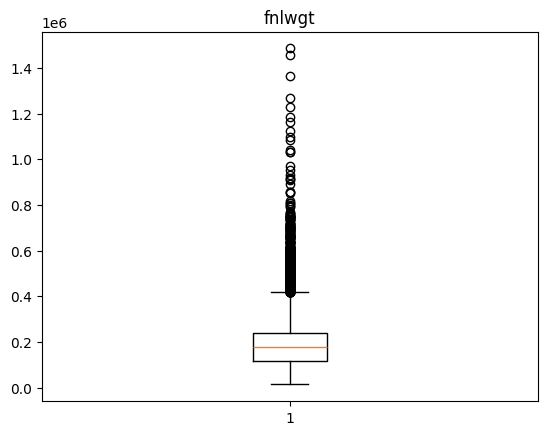

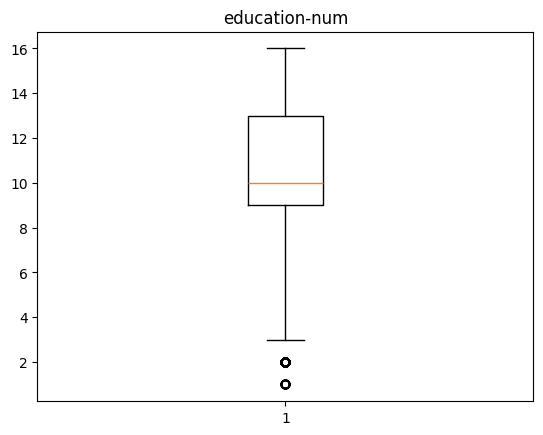

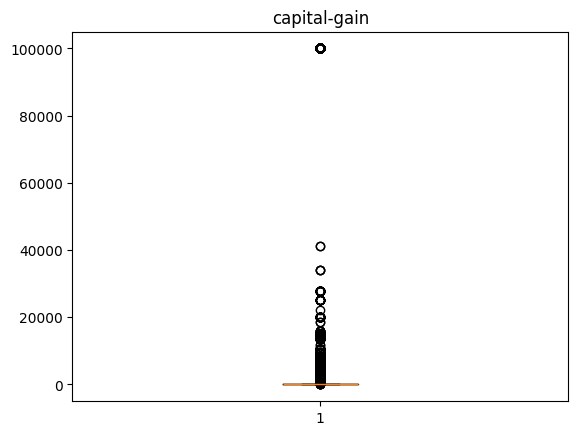

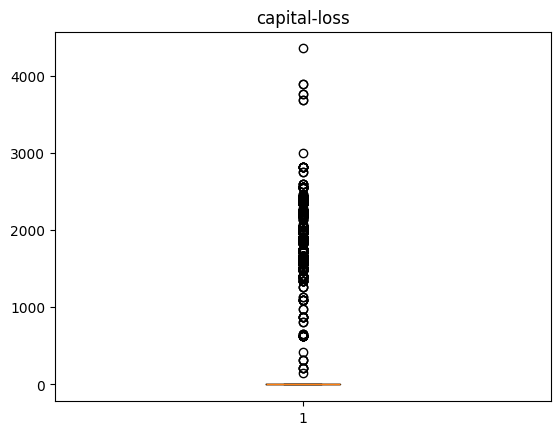

In [82]:
import matplotlib.pyplot as plt

num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']

for col in num_cols:
    plt.figure()
    plt.boxplot(df_clean[col])
    plt.title(col)
    plt.show()

In [90]:
df_clean['capital-gain-log'] = np.log1p(df_clean['capital-gain'])
df_clean['capital-loss-log'] = np.log1p(df_clean['capital-loss'])

In [91]:
df_clean = df_clean.drop(columns=['capital-gain', 'capital-loss'])

In [92]:
df_clean[['capital-gain-log', 'capital-loss-log']].describe()

,capital-gain-log,capital-loss-log
count,30139.000000,30139.000000
mean,0.744214,0.355497
std,2.471375,1.595588
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,11.512925,8.379539


In [93]:
df_clean['age_group'] = pd.cut(
    df_clean['age'],
    bins=[0, 25, 45, 65, 100],
    labels=['young', 'adult', 'senior', 'elder']
)

In [ ]:
df_clean = df_clean.drop(columns=['age'])

In [98]:
df_clean = df_clean.drop(columns=['workclass','education'])

In [99]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fnlwgt                30139 non-null  int64   
 1   education-num         30139 non-null  int64   
 2   marital-status        30139 non-null  str     
 3   occupation            30139 non-null  str     
 4   relationship          30139 non-null  str     
 5   race                  30139 non-null  str     
 6   sex                   30139 non-null  str     
 7   hours-per-week        30139 non-null  int64   
 8   native-country        30139 non-null  str     
 9   income                30139 non-null  int64   
 10  education_categories  30139 non-null  str     
 11  workclass_categories  30139 non-null  str     
 12  capital-gain-log      30139 non-null  float64 
 13  capital-loss-log      30139 non-null  float64 
 14  age_group             30139 non-null  category
dtypes: category(1), fl

In [102]:
categorical_cols = [
    'workclass_categories',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'education_categories',
    'age_group'
]

data_final = pd.get_dummies(
    df_clean,
    columns=categorical_cols,
    drop_first=True
)

In [103]:
data_final.head()

,fnlwgt,education-num,hours-per-week,income,capital-gain-log,capital-loss-log,workclass_categories_unemployed,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,education_categories_Elementary,education_categories_High_School,age_group_adult,age_group_senior,age_group_elder
0,77516,13,40,0,7.684784,0.0,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,83311,13,13,0,0.000000,0.0,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,215646,9,40,0,0.000000,0.0,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False
3,234721,7,40,0,0.000000,0.0,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
4,338409,13,40,0,0.000000,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [104]:
X = data_final.drop(columns=['hours-per-week'])
y = data_final['hours-per-week']

In [107]:
data_final.info()

<class 'pandas.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 81 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   fnlwgt                                     30139 non-null  int64  
 1   education-num                              30139 non-null  int64  
 2   hours-per-week                             30139 non-null  int64  
 3   income                                     30139 non-null  int64  
 4   capital-gain-log                           30139 non-null  float64
 5   capital-loss-log                           30139 non-null  float64
 6   workclass_categories_unemployed            30139 non-null  bool   
 7   marital-status_Married-AF-spouse           30139 non-null  bool   
 8   marital-status_Married-civ-spouse          30139 non-null  bool   
 9   marital-status_Married-spouse-absent       30139 non-null  bool   
 10  marital-status_Never-married          

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = [
    'fnlwgt',
    'education-num',
    'capital-gain-log',
    'capital-loss-log',
    'income'
]

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

     


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
     


In [113]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24111, 80), (6028, 80), (24111,), (6028,))

In [114]:
X_train.to_csv("data_X_train.csv", index=False)
X_test.to_csv("data_X_test.csv", index=False)
y_train.to_csv("variable_y_train.csv", index=False)
y_test.to_csv("variable_y_test.csv", index=False)
     
